# Deep Learning

In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

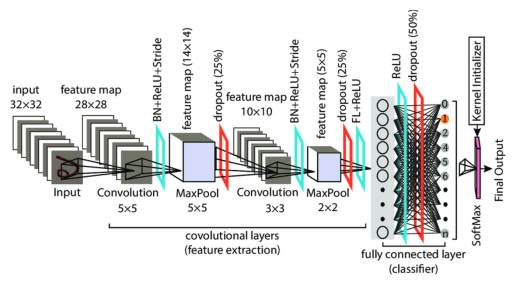

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('download.png')
plt.imshow(imagem)
plt.axis('off') 
plt.show()

# Obtendo Dados de Imagemns e Ja Seprando

Text(0.5, 1.0, '5')

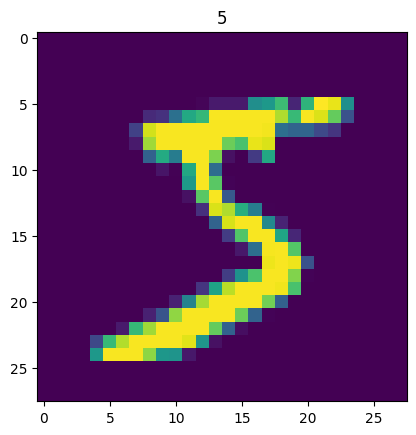

In [2]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

# Visualização de imagens específicas
plt.imshow(X_treinamento[0])
plt.title(y_treinamento[0])

# AJUSTANDO IMAGENS 

In [3]:
print(len(X_treinamento))
print(np.prod(X_treinamento.shape[1:]))

60000
784


In [4]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')
X_teste[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255
X_teste[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np.eye(10)[y_treinamento]
y_teste = np.eye(10)[y_teste]
print(y_treinamento[0], y_teste[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# CRIANDO ARQUETETURA DE MODELO

In [8]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 10, activation = 'softmax'))

modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                

# TREINADO MODELO

In [9]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 100, validation_data = (X_teste, y_teste))


Epoch 1/100


1875/1875 [==============================] - 13s 5ms/step - loss: 0.4713 - accuracy: 0.8541 - val_loss: 0.1787 - val_accuracy: 0.9449
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2363 - accuracy: 0.9313 - val_loss: 0.1348 - val_accuracy: 0.9592
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1949 - accuracy: 0.9443 - val_loss: 0.1224 - val_accuracy: 0.9640
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1691 - accuracy: 0.9508 - val_loss: 0.1049 - val_accuracy: 0.9689
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1525 - accuracy: 0.9553 - val_loss: 0.1065 - val_accuracy: 0.9690
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1420 - accuracy: 0.9576 - val_loss: 0.1042 - val_accuracy: 0.9684
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1340 - accuracy: 0.9607 - val_loss: 0.1013 - va

# VISUALISANDO TREINAMENTO

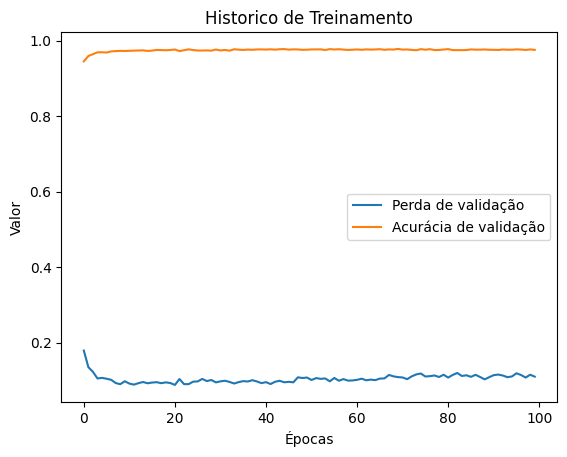

In [10]:
historico.history.keys()
plt.plot(historico.history['val_loss'], label='Perda de validação')
plt.plot(historico.history['val_accuracy'], label='Acurácia de validação')

plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.title('Historico de Treinamento')

plt.legend()
plt.show()


# ANALISANDO RESULTADOS

In [11]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 1s 3ms/step


array([[5.90247371e-15, 2.25204587e-17, 2.20543743e-08, ...,
        1.00000000e+00, 5.47912758e-17, 1.87186573e-12],
       [3.59909043e-15, 8.11488280e-06, 9.99991894e-01, ...,
        4.19496970e-09, 4.79247042e-09, 4.81361214e-17],
       [1.75124524e-20, 1.00000000e+00, 1.43536875e-11, ...,
        1.91397020e-11, 1.22948307e-09, 3.23812702e-16],
       ...,
       [2.59262534e-15, 7.19949409e-14, 6.24095220e-11, ...,
        9.65313177e-11, 1.48559194e-14, 2.58660435e-07],
       [9.02597924e-24, 8.03805339e-22, 5.32180544e-18, ...,
        3.57240215e-17, 8.42453993e-16, 3.36288470e-15],
       [2.46868964e-21, 1.22624681e-35, 7.39055232e-22, ...,
        8.85815000e-33, 6.02369786e-28, 0.00000000e+00]], dtype=float32)

In [12]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    1,    0,    0,    0,    1,    3,    2,    2,    0],
       [   0, 1124,    1,    5,    0,    0,    2,    0,    3,    0],
       [   5,    0,  994,    6,    5,    1,    2,   11,    8,    0],
       [   0,    0,    1,  991,    0,    7,    0,    5,    2,    4],
       [   0,    0,    2,    0,  958,    0,    7,    4,    0,   11],
       [   2,    1,    0,   10,    1,  868,    5,    0,    3,    2],
       [   5,    3,    0,    1,    2,    3,  941,    0,    3,    0],
       [   3,    3,    8,    3,    0,    0,    0, 1002,    5,    4],
       [   7,    1,    2,    5,    7,    6,    2,    4,  931,    9],
       [   3,    2,    0,    7,   16,    3,    0,    3,    1,  974]],
      dtype=int64)

In [13]:
# convertendo o array para o formato de matriz
# número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [14]:
# passo a mesma posição para o modelo prever
novo = X_treinamento[20]
# de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
# previsao
pred = modelo.predict(novo)
# maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 53ms/step


[4]